# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

# Loading the Data and Data Overview

In [2]:
train = pd.read_csv('"C:\Users\navan\Downloads\train.csv"')
test = pd.read_csv('"C:\Users\navan\Downloads\test.csv"')

In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling with the Outliers

In [7]:
def plot_outliers(df, column):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(df[column])
    plt.title(f'{column} - Box Plot')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} - Histogram')

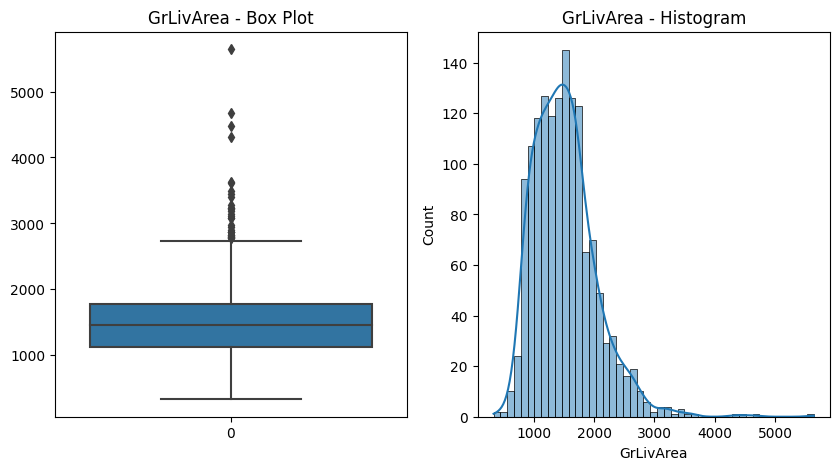

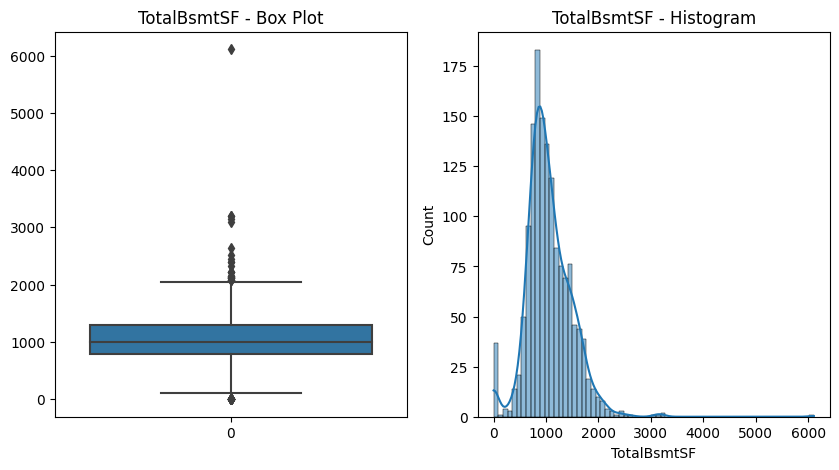

In [8]:
plot_outliers(train, 'GrLivArea')
plot_outliers(train, 'TotalBsmtSF')

In [9]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

train = remove_outliers(train, 'GrLivArea')
train = remove_outliers(train, 'TotalBsmtSF')

# Filling missing values

In [10]:
missing_data = train.isnull().sum().sort_values(ascending=False)
missing_percentage = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_info = pd.concat([missing_data, missing_percentage], axis=1, keys=['Total', 'Percent'])
missing_info.head(20)

,Total,Percent
PoolQC,1364,0.997805
MiscFeature,1318,0.964155
Alley,1279,0.935625
Fence,1099,0.803950
MasVnrType,819,0.599122
FireplaceQu,659,0.482078
LotFrontage,246,0.179956
GarageYrBlt,72,0.052670
GarageFinish,72,0.052670
GarageQual,72,0.052670


In [11]:
# Splitting categorical and numerical feats
categorical_feats = train.select_dtypes(include=['object']).columns
numerical_feats = train.select_dtypes(exclude=['object']).columns

In [12]:
# Identify columns with missing values
missing_cat_cols = [col for col in categorical_feats if train[col].isnull().sum() > 0]
missing_num_cols = [col for col in numerical_feats if train[col].isnull().sum() > 0]

### According to the dataset documentation, NaN values in certain categorical columns indicate the absence of the feature. Hence, filling them with 'None'.

In [13]:
def fill_missing_values(df, cat_cols, num_cols):

    for col in cat_cols:
        if 'Pool' in col or 'Garage' in col or 'Fireplace' in col or 'Bsmt' in col or 'Alley' in col or 'Fence' in col or 'MiscFeature' in col:
            df[col].fillna('None', inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    for col in num_cols:
        df[col].fillna(df[col].median(), inplace=True)

fill_missing_values(train, missing_cat_cols, missing_num_cols)
fill_missing_values(test, missing_cat_cols, missing_num_cols)

In [14]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

train['GarageYrBlt'] = train.apply(lambda row: 0 if row['GarageType'] == 'None' else row['GarageYrBlt'], axis=1)
test['GarageYrBlt'] = test.apply(lambda row: 0 if row['GarageType'] == 'None' else row['GarageYrBlt'], axis=1)

# Feature Engineering

In [15]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']
test['RemodAge'] = test['YrSold'] - test['YearRemodAdd']

In [16]:
train['TotalBathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) + train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
test['TotalBathrooms'] = (test['FullBath'] + (0.5 * test['HalfBath']) + test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))

train['TotalPorchSF'] = (train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF'])
test['TotalPorchSF'] = (test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch'] + test['WoodDeckSF'])

train['TotalRooms'] = train['TotRmsAbvGrd'] + train['TotalBsmtSF']
test['TotalRooms'] = test['TotRmsAbvGrd'] + test['TotalBsmtSF']

# Encoding

In [17]:
y = train['SalePrice']
train_ids = train['Id']
test_ids = test['Id']

train.drop(['SalePrice', 'Id'], axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Model Training and Evaluation

In [18]:
# Align train and test sets
train, test = train.align(test, join='outer', axis=1, fill_value=0)

X = train

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [19]:
# Model and hyperparameter settings
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

params = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'RandomForest': {'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt', 'log2']},
    'XGBRegressor': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'CatBoost': {'iterations': [100, 200], 'learning_rate': [0.01, 0.1]}
}

# Train and Evaluate Models

In [20]:
results = {}
for model_name in models:
    model = models[model_name]
    param = params[model_name]
    grid = GridSearchCV(model, param, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    
    y_pred = grid.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'best_params': grid.best_params_,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    print(f"{model_name} Mean Absolute Error (MAE): {mae:.2f}")
    print(f"{model_name} Mean Squared Error (MSE): {mse:.2f}")
    print(f"{model_name} Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

LinearRegression Mean Absolute Error (MAE): 52665215.07
LinearRegression Mean Squared Error (MSE): 232523552233550432.00
LinearRegression Root Mean Squared Error (RMSE): 482206959.96
LinearRegression R-squared (R2): -55360607.99
Ridge Mean Absolute Error (MAE): 14284.90
Ridge Mean Squared Error (MSE): 363876538.16
Ridge Root Mean Squared Error (RMSE): 19075.55
Ridge R-squared (R2): 0.91
Lasso Mean Absolute Error (MAE): 15058.96
Lasso Mean Squared Error (MSE): 409453835.12
Lasso Root Mean Squared Error (RMSE): 20234.97
Lasso R-squared (R2): 0.90
ElasticNet Mean Absolute Error (MAE): 14285.34
ElasticNet Mean Squared Error (MSE): 363808249.23
ElasticNet Root Mean Squared Error (RMSE): 19073.76
ElasticNet R-squared (R2): 0.91
RandomForest Mean Absolute Error (MAE): 15294.77
RandomForest Mean Squared Error (MSE): 475591555.37
RandomForest Root Mean Squared Error (RMSE): 21808.06
RandomForest R-squared (R2): 0.89
XGBRegressor Mean Absolute Error (MAE): 14508.66
XGBRegressor Mean Squared Erro

# Select the Best Model

In [21]:
best_model_name = min(results, key=lambda x: results[x]['mse'])
best_model = models[best_model_name]

In [22]:
print(f"\nBest Model: {best_model_name}")
print(f"Best Parameters: {results[best_model_name]['best_params']}")
print(f"Best MAE: {results[best_model_name]['mae']:.2f}")
print(f"Best MSE: {results[best_model_name]['mse']:.2f}")
print(f"Best RMSE: {results[best_model_name]['rmse']:.2f}")
print(f"Best R2: {results[best_model_name]['r2']:.2f}")


Best Model: CatBoost
Best Parameters: {'iterations': 200, 'learning_rate': 0.1}
Best MAE: 13471.27
Best MSE: 351806424.45
Best RMSE: 18756.50
Best R2: 0.92


# Train the Best Model on the Entire Data

In [23]:
best_model.fit(X, y)

test_predictions = best_model.predict(test) 

# Save Predictions

In [24]:
submission = pd.DataFrame({
    'Id': test_ids, 
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)

In [25]:
submission.head()

,Id,SalePrice
0,1461,127120.368424
1,1462,163534.605498
2,1463,187075.832133
3,1464,193281.358038
4,1465,178733.050827
